# EBL  

In [34]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.2.0rc6


In [35]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_dominguez=EBLAbsorptionTemplate.from_name('Dominguez_2010')
ebl_finke=EBLAbsorptionTemplate.from_name('Finke_2010')
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')


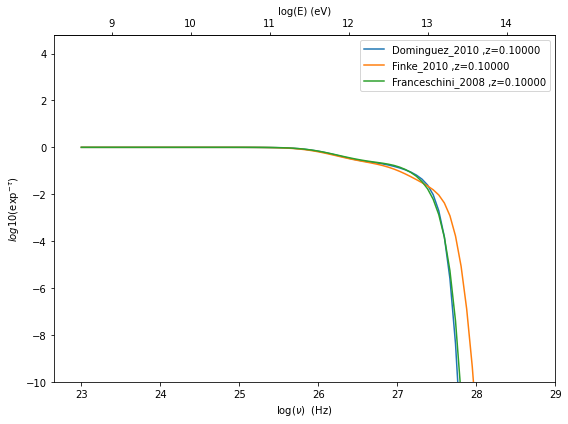

In [36]:
z=0.1
nu=np.logspace(23,30,100)
ebl_dominguez.parameters.z_cosm.val=z
ebl_dominguez.eval(nu=nu)
ebl_finke.parameters.z_cosm.val=z
ebl_finke.eval(nu=nu)
ebl_franceschini.parameters.z_cosm.val=z
ebl_franceschini.eval(nu=nu)
p=ebl_dominguez.plot_model()
ebl_finke.plot_model(p)
ebl_franceschini.plot_model(p)
p.rescale(y_min=-10,x_max=29)

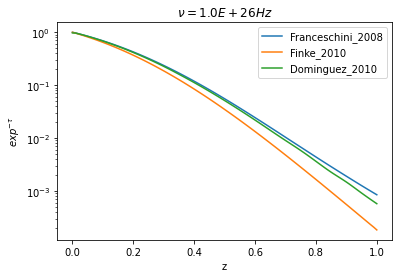

In [37]:
nu=1E26
z_range=np.linspace(0.001,1,100)
y_fr = np.zeros(z_range.size)
y_fi = np.zeros(z_range.size)
y_do = np.zeros(z_range.size)
for ID,z in enumerate(z_range):
    ebl_franceschini.parameters.z_cosm.val=z
    ebl_finke.parameters.z_cosm.val=z
    ebl_dominguez.parameters.z_cosm.val=z
    y_fr[ID]=ebl_franceschini.eval(nu=nu,get_model=True)
    y_fi[ID]=ebl_finke.eval(nu=nu,get_model=True)
    y_do[ID]=ebl_dominguez.eval(nu=nu,get_model=True)


plt.plot(z_range,y_fr,label='%s'%ebl_franceschini.name)
plt.plot(z_range,y_fi,label='%s'%ebl_finke.name)
plt.plot(z_range,y_do,label='%s'%ebl_dominguez.name)

plt.xlabel('z')
plt.ylabel(r'$exp^{-\tau}$')
plt.legend()
plt.semilogy()
t=plt.title(r'$\nu=%1.1E Hz$'%nu)

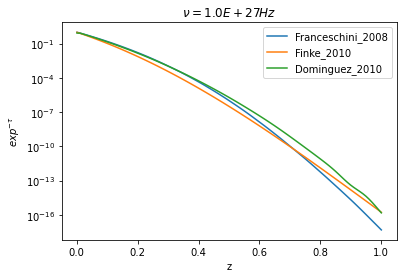

In [38]:
%matplotlib inline
z_range=np.linspace(0.001,1,100)
y_fr = np.zeros(z_range.size)
y_fi = np.zeros(z_range.size)
y_do = np.zeros(z_range.size)
nu=1E27
for ID,z in enumerate(z_range):
    ebl_franceschini.parameters.z_cosm.val=z
    ebl_finke.parameters.z_cosm.val=z
    ebl_dominguez.parameters.z_cosm.val=z
    y_fr[ID]=ebl_franceschini.eval(nu=nu,get_model=True)
    y_fi[ID]=ebl_finke.eval(nu=nu,get_model=True)
    y_do[ID]=ebl_dominguez.eval(nu=nu,get_model=True)


plt.plot(z_range,y_fr,label='%s'%ebl_franceschini.name)
plt.plot(z_range,y_fi,label='%s'%ebl_finke.name)
plt.plot(z_range,y_do,label='%s'%ebl_dominguez.name)

plt.xlabel('z')
plt.ylabel(r'$exp^{-\tau}$')
plt.legend()
plt.semilogy()
t=plt.title(r'$\nu=%1.1E Hz$'%nu)

## Combine a Jet model with the EBL model 

As first step, we define our Jet model

In [39]:
from jetset.jet_model import Jet
from jetset.model_manager import FitModel

my_jet=Jet(electron_distribution='lppl',name='jet_leptonic')

In [40]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')

In [41]:
composite_model=FitModel(nu_size=500,name='EBL corrected')
composite_model.add_component(my_jet)
composite_model.add_component(ebl_franceschini)


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/model_manager.py:147: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


In [42]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


Since, both the Jet model the EBL share the same parameter, i.e. the redshift, we link the two parameters 

In [43]:
composite_model.link_par(par_name='z_cosm', from_model='Franceschini_2008', to_model='jet_leptonic')

==> par: z_cosm from model: Franceschini_2008 linked to same parameter in model jet_leptonic


In [44]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm(M),redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


These methods are alternative ways to set a parameter in a composite model

In [45]:
composite_model.jet_leptonic.parameters.z_cosm.val=0.1
composite_model.set_par('jet_leptonic','z_cosm',0.1)
composite_model.set_par(my_jet,'z_cosm',0.1)

Since as default, added components are summed together, so we need to define the correct multiplicative for for the composite model.

In [46]:
composite_model.show_model_components()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: EBL corrected  
type: composite_model  
components models:
 -model name: jet_leptonic model type: jet
 -model name: Franceschini_2008 model type: table2D

--------------------------------------------------------------------------------


This can be done just by writing the mathematical expression as a string, using the model names reported in the model description table, and that's it!

In [47]:
composite_model.composite_expr='jet_leptonic*Franceschini_2008'

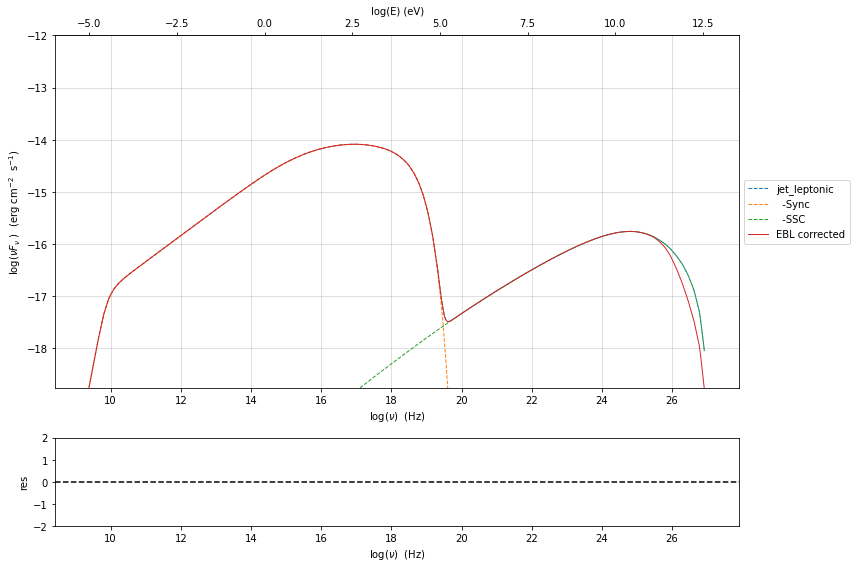

In [48]:
composite_model.jet_leptonic.IC_nu_size=150
composite_model.eval()
p=composite_model.plot_model()
p.rescale(y_max=-12)

if you want to remove the link from the parameter 

In [49]:
composite_model.parameters.reset_dependencies()

In [50]:
composite_model.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


None

now the two `z_cosm` parameters are not linkend anymore

## Example of model fitting with EBL

In [51]:
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data

In [52]:
test_SEDs

['/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_ABS.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_DEABS.ecsv']


***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/astropy/table/table.py:1187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]


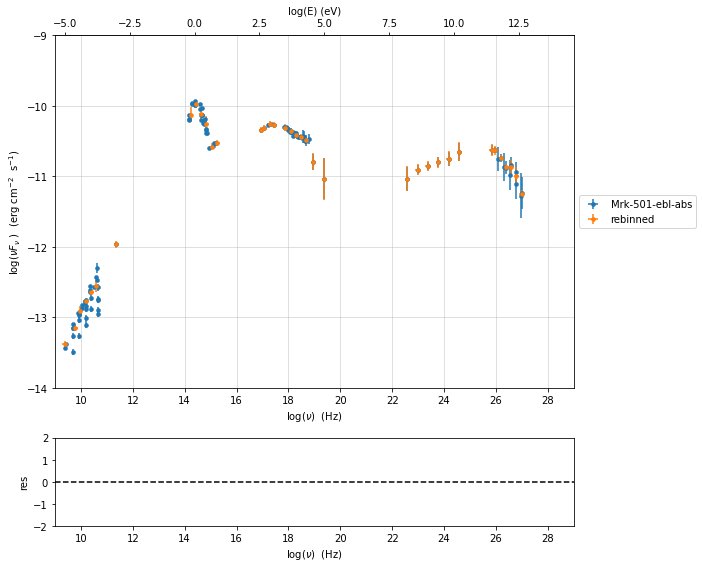

In [53]:
%matplotlib inline
data=Data.from_file(test_SEDs[2])
sed_data=ObsData(data_table=data)
myPlot=sed_data.plot_sed()

sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.1,[10.**6,10.**29])
myPlot.add_data_plot(sed_data,label='rebinned')
myPlot.rescale(y_min=-14,y_max=-9,x_min=9,x_max=29)


*** evaluating spectral indices for data ***



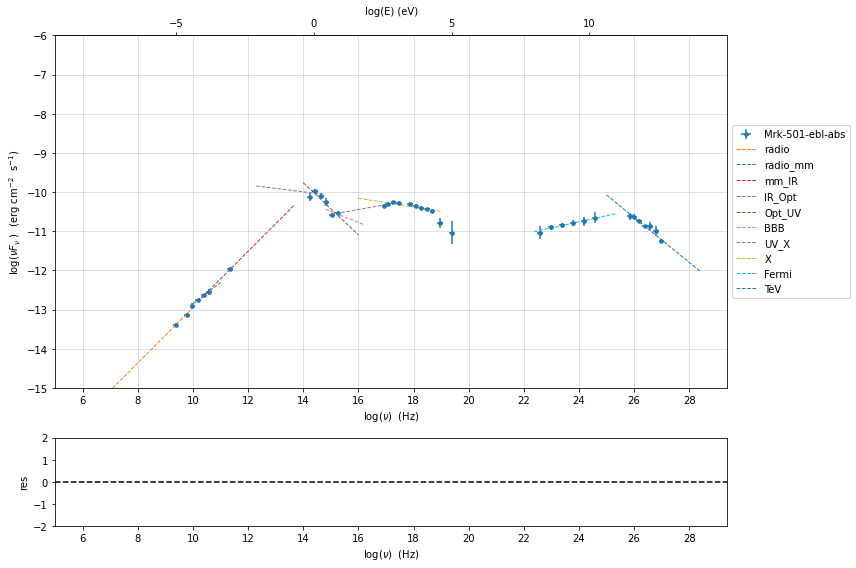

In [54]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

In [55]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP




model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-6.411144e-02,-6.411144e-02,7.838965e-03,--,-4.778764e-02,-1.000000e+01,0.000000e+00,False
LogCubic,c,-1.751721e-03,-1.751721e-03,1.127030e-03,--,3.576201e-03,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,1.703747e+01,1.703747e+01,9.437354e-02,--,1.626870e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.030068e+01,-1.030068e+01,1.884114e-02,--,-1.025412e+01,-3.000000e+01,0.000000e+00,False
host_galaxy,nuFnu_p_host,-1.006557e+01,-1.006557e+01,5.462528e-02,--,-1.025412e+01,-1.225412e+01,-8.254123e+00,False
host_galaxy,nu_scale,1.730764e-02,1.730764e-02,3.694887e-03,--,0.000000e+00,-5.000000e-01,5.000000e-01,False


---> sync       nu_p=+1.703747e+01 (err=+9.437354e-02)  nuFnu_p=-1.030068e+01 (err=+1.884114e-02) curv.=-6.411144e-02 (err=+7.838965e-03)




*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit
-------------------------------------------------------------------------
Fit report

Model: IC-shape-fit


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/minimizer.py:847: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  self.mesg=self.minuit_fun.migrad(ncall=max_ev)


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
LogCubic,b,curvature,,-1.565399e-01,-1.000000e+01,0.000000e+00,False,False
LogCubic,c,third-degree,,-4.351917e-02,-1.000000e+01,1.000000e+01,False,False
LogCubic,Ep,peak freq,Hz,2.529709e+01,0.000000e+00,3.000000e+01,True,False
LogCubic,Sp,peak flux,erg / (cm2 s),-1.058825e+01,-3.000000e+01,0.000000e+00,True,False



converged=True
calls=50
mesg=


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 2.632                      │              Nfcn = 50               │
│ EDM = 1.7e-06 (Goal: 0.0002)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │  -0.157   │   0.026   │            │            │   -10   │    0    │       │
│ 1 │ par_1 │  -0.044   │   0.020   │            │            │   -10   │   10    │       │
│ 2 │ par_2 │   25.30   │   0.18    │            │            │    0    │   30    │       │
│ 3 │ par_3 │  -10.59   │   0.05    │            │            │   -30   │    0    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3 │
├───────┼─────────────────────────────────────────┤
│ par_0 │  0.000651   0.00033  -0.00289 -9.45e-05 │
│ par_1 │   0.00033  0.000413  -0.00348  0.000582 │
│ par_2 │  -0.00289  -0.00348     0.033  -0.00612 │
│ par_3 │ -9.45e-05  0.000582  -0.00612   0.00255 │
└───────┴─────────────────────────────────────────┘

dof=7
chisq=2.631978, chisq/red=0.375997 null hypothesis sig=0.916836

stats without the UL
dof  UL=7
chisq=2.631978, chisq/red=0.375997 null hypothesis sig=0.916836


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.565399e-01,-1.565399e-01,2.551779e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-4.351917e-02,-4.351917e-02,2.032066e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.529709e+01,2.529709e+01,1.817241e-01,--,2.536916e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.058825e+01,-1.058825e+01,5.046950e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


-------------------------------------------------------------------------





model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.565399e-01,-1.565399e-01,2.551779e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-4.351917e-02,-4.351917e-02,2.032066e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.529709e+01,2.529709e+01,1.817241e-01,--,2.536916e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.058825e+01,-1.058825e+01,5.046950e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> IC         nu_p=+2.529709e+01 (err=+1.817241e-01)  nuFnu_p=-1.058825e+01 (err=+5.046950e-02) curv.=-1.565399e-01 (err=+2.551779e-02)



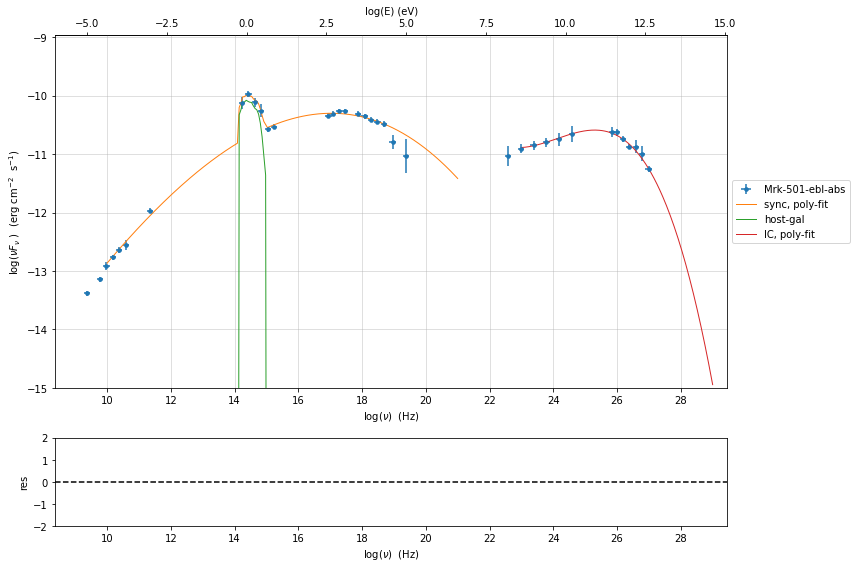

In [56]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

In [57]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False, silent=True)
prefit_jet.save_model('prefit_jet_gal_templ.pkl')


***  constrains parameters from observable ***



/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/obs_constrain.py:650: RankWarning: Polyfit may be poorly conditioned
  return func(*args, **kwargs),completed


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,1.057083e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,5.050000e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,2.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,3.360000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.487509e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.310708e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,2.989983e+01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.045843e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.248787e+00,-1.000000e+01,1.000000e+01,False,False


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/model_manager.py:147: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


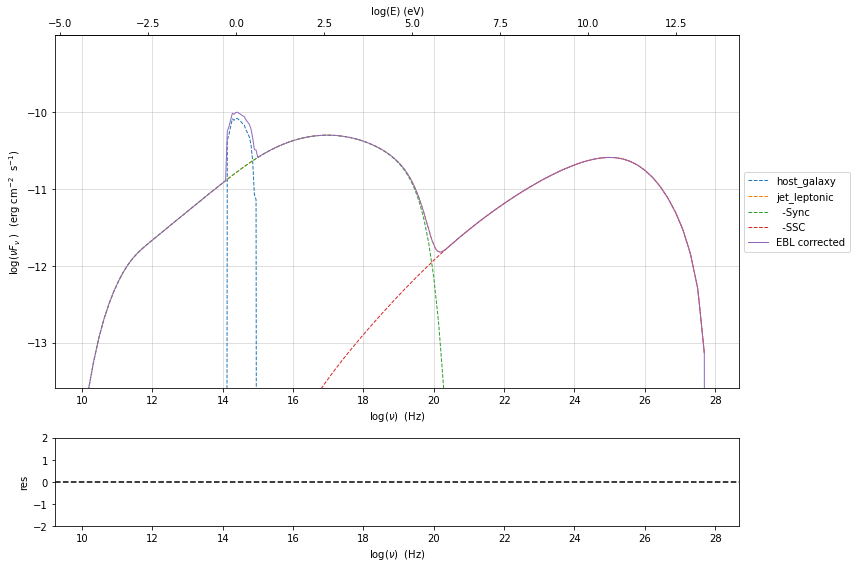

In [58]:
composite_model=FitModel(nu_size=500,name='EBL corrected',template=my_shape.host_gal)
composite_model.add_component(prefit_jet)
composite_model.eval()
composite_model.plot_model()

In [59]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')
composite_model.add_component(ebl_franceschini)

In [60]:
composite_model.link_par(par_name='z_cosm', from_model='Franceschini_2008', to_model='jet_leptonic')
composite_model.composite_expr='(jet_leptonic+host_galaxy)*Franceschini_2008'

==> par: z_cosm from model: Franceschini_2008 linked to same parameter in model jet_leptonic


In [61]:
composite_model.show_model()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: EBL corrected  
type: composite_model  
components models:
 -model name: host_galaxy model type: template
 -model name: jet_leptonic model type: jet
 -model name: Franceschini_2008 model type: table2D

--------------------------------------------------------------------------------
individual component description

--------------------------------------------------------------------------------
model description
--------------------------------------------------------------------------------
name: host_galaxy  
type: template  

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
host_galaxy,nuFnu_p_host,nuFnu-scale,erg / (cm2 s),-1.006557e+01,-2.000000e+01,2.000000e+01,False,False
host_galaxy,nu_scale,nu-scale,Hz,1.730764e-02,-2.000000e+00,2.000000e+00,False,False


--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 1.487509e+02
 gmax grid : 2.310708e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,1.057083e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,5.050000e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,2.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm(M),redshift,,3.360000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.487509e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.310708e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,2.989983e+01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.045843e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,s,LE_spectral_slope,,2.248787e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
model description
--------------------------------------------------------------------------------
name: Franceschini_2008  
type: table2D  

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
Franceschini_2008,"z_cosm(L,jet_leptonic)",redshift,,--,--,--,False,True


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


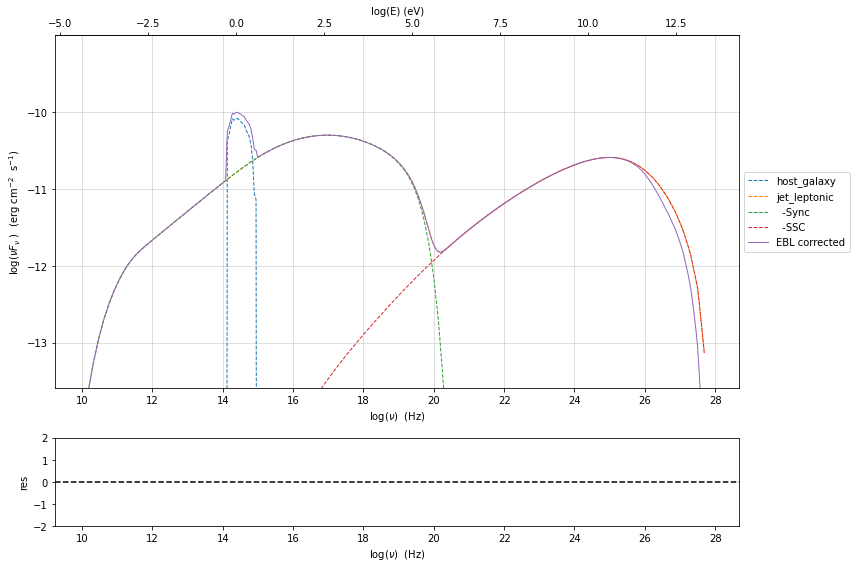

In [62]:
composite_model.eval()
composite_model.plot_model()

In [63]:
from jetset.minimizer import ModelMinimizer
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet



composite_model.freeze(prefit_jet,'z_cosm')
composite_model.freeze(prefit_jet,'R_H')
composite_model.jet_leptonic.parameters.beam_obj.fit_range=[5,50]
composite_model.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
composite_model.jet_leptonic.parameters.gmax.fit_range=[1E4,1E8]
composite_model.jet_leptonic.parameters.z_cosm.val=0.03


composite_model.host_galaxy.parameters.nuFnu_p_host.frozen=False
composite_model.host_galaxy.parameters.nu_scale.frozen=True
composite_model.jet_leptonic.nu_size=200
composite_model.jet_leptonic.IC_nu_size=100
model_minimizer_lsb=ModelMinimizer('lsb')
best_fit=model_minimizer_lsb.fit(composite_model,sed_data,1E11,1E29,fitname='SSC-best-fit-lsb',repeat=3)

filtering data in fit range = [1.000000e+11,1.000000e+29]
data length 31

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=8.65708e+00

fit run: 1
- old chisq=8.65708e+00


0it [00:00, ?it/s]

- best chisq=8.65708e+00

fit run: 2
- old chisq=8.65708e+00


0it [00:00, ?it/s]

- best chisq=8.65708e+00

-------------------------------------------------------------------------
Fit report

Model: SSC-best-fit-lsb


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
host_galaxy,nuFnu_p_host,nuFnu-scale,erg / (cm2 s),-1.005318e+01,-2.000000e+01,2.000000e+01,False,False
host_galaxy,nu_scale,nu-scale,Hz,1.730764e-02,-2.000000e+00,2.000000e+00,False,True
jet_leptonic,R,region_size,cm,1.331857e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.430901e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,3.825207e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm(M),redshift,,3.000000e-02,0.000000e+00,--,False,True
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,9.433759e+01,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.114571e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,3.099671e+01,0.000000e+00,--,False,False



converged=True
calls=21
mesg=


'The relative error between two consecutive iterates is at most 0.000000'

dof=21
chisq=8.657084, chisq/red=0.412242 null hypothesis sig=0.991665

best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
host_galaxy,nuFnu_p_host,-1.005318e+01,-1.005318e+01,3.308679e-02,--,-1.006557e+01,-1.225412e+01,-8.254123e+00,False
host_galaxy,nu_scale,1.730764e-02,--,--,--,1.730764e-02,-5.000000e-01,5.000000e-01,True
jet_leptonic,R,1.331857e+16,1.331857e+16,1.137047e+16,--,1.057083e+16,3.162278e+15,3.162278e+17,False
jet_leptonic,R_H,1.000000e+17,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,1.430901e-02,1.430901e-02,5.822142e-03,--,5.050000e-02,0.000000e+00,--,False
jet_leptonic,beam_obj,3.825207e+01,3.825207e+01,1.194162e+01,--,2.500000e+01,5.000000e+00,5.000000e+01,False
jet_leptonic,z_cosm(M),3.000000e-02,--,--,--,3.000000e-02,0.000000e+00,--,True
jet_leptonic,gmin,9.433759e+01,9.433759e+01,8.623754e+01,--,1.487509e+02,1.000000e+00,1.000000e+09,False
jet_leptonic,gmax,2.114571e+06,2.114571e+06,6.522991e+05,--,2.310708e+06,1.000000e+04,1.000000e+08,False
jet_leptonic,N,3.099671e+01,3.099671e+01,2.839969e+01,--,2.989983e+01,0.000000e+00,--,False


-------------------------------------------------------------------------




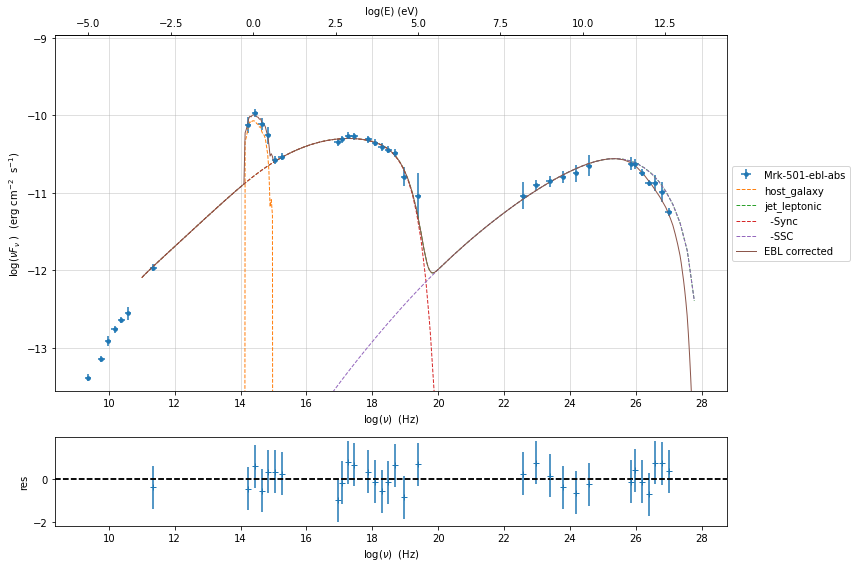

In [64]:
p=composite_model.plot_model(sed_data=sed_data)